In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("Housing.csv")
df.head(5)   

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail(5)                        

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df = df.drop(['airconditioning', 'hotwaterheating'], axis=1)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


In [ ]:
df = df.rename(columns={"bedrooms": "BR", "stories": "STR", "mainroad": "MR" })
df.head(5)

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


In [ ]:
df.shape

(545, 11)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [ ]:
df.count()

price               545
area                545
BR                  545
bathrooms           545
STR                 545
MR                  545
guestroom           545
basement            545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


In [ ]:
df.count()

price               545
area                545
BR                  545
bathrooms           545
STR                 545
MR                  545
guestroom           545
basement            545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [ ]:
print(df.isnull().sum())

price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df = df.dropna()    
df.count()

price               545
area                545
BR                  545
bathrooms           545
STR                 545
MR                  545
guestroom           545
basement            545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [ ]:
print(df.isnull().sum())

price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


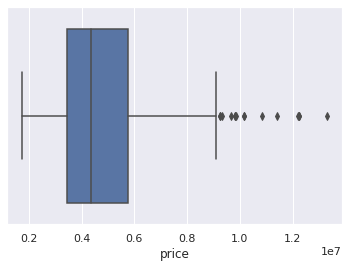

In [ ]:
sns.boxplot(x=df['price'])

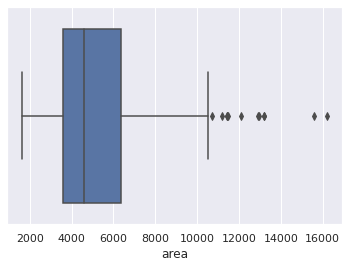

In [ ]:
sns.boxplot(x=df['area'])

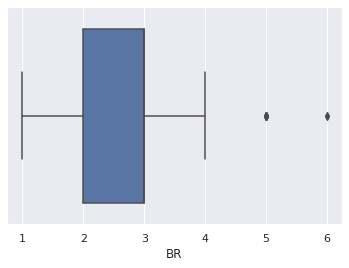

In [ ]:
sns.boxplot(x=df['BR'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price        2310000.0
area            2760.0
BR                 1.0
bathrooms          1.0
STR                1.0
parking            1.0
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(463, 11)

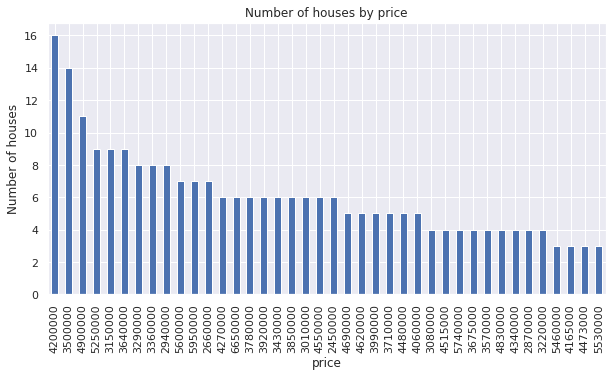

In [ ]:
df.price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of houses by price")
plt.ylabel('Number of houses')
plt.xlabel('price');

,price,area,BR,bathrooms,STR,parking
price,1.000000,0.506596,0.337368,0.410914,0.233379,0.328241
area,0.506596,1.000000,0.102033,0.116276,-0.098621,0.294469
BR,0.337368,0.102033,1.000000,0.339824,0.469634,0.096401
bathrooms,0.410914,0.116276,0.339824,1.000000,0.197759,0.114545
STR,0.233379,-0.098621,0.469634,0.197759,1.000000,-0.068653
parking,0.328241,0.294469,0.096401,0.114545,-0.068653,1.000000


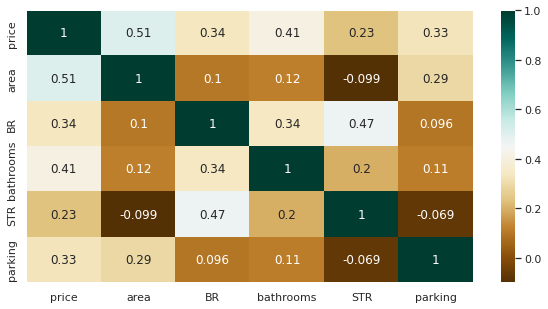

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

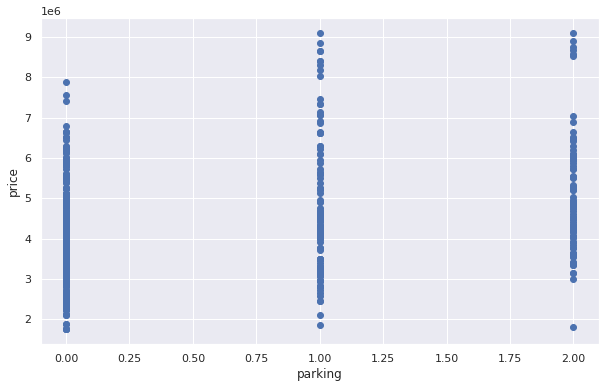

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['parking'], df['price'])
ax.set_xlabel('parking')
ax.set_ylabel('price')
plt.show()